In [ ]:
# CONNECT GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os, re, glob, cv2, numpy as np

path = os.path.abspath('PotatoDisease.ipynb') #absolute path of program
path = re.sub('[a-zA-Z\s._]+$', '', path) #remove unintended file
dirs = os.listdir('/content/drive/My Drive/Dataset/PotatoDisease/train/') #list directory

label = 0
im_arr = []
lb_arr = []
x = []
y = []
IMAGE_SIZE = 256

for i in dirs: #loop all directory
  count = 0
  for pic in glob.glob('/content/drive/My Drive/Dataset/PotatoDisease/train/'+i+'/*'):
    im = cv2.imread(pic) #open image
    im = cv2.resize(im,(IMAGE_SIZE,IMAGE_SIZE)) #resize image
    im = np.array(im) # change into array
    count = count + 1
    x.append(im)
    y.append(label)
    if(count <= 10): #sample
      im_arr.append({str(i):im})
  
  print("jumlah "+str(i)+" : "+str(count))
  label = label + 1
  lb_arr.append(i)
  
x = np.array(x)
y = np.array(y);

jumlah Potato_Earlyblight : 3422
jumlah Potato_Healthy : 2332
jumlah Potato_Lateblight : 3421


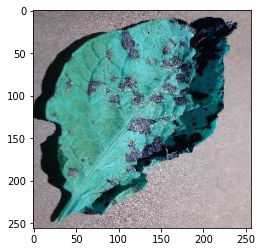

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x[0])

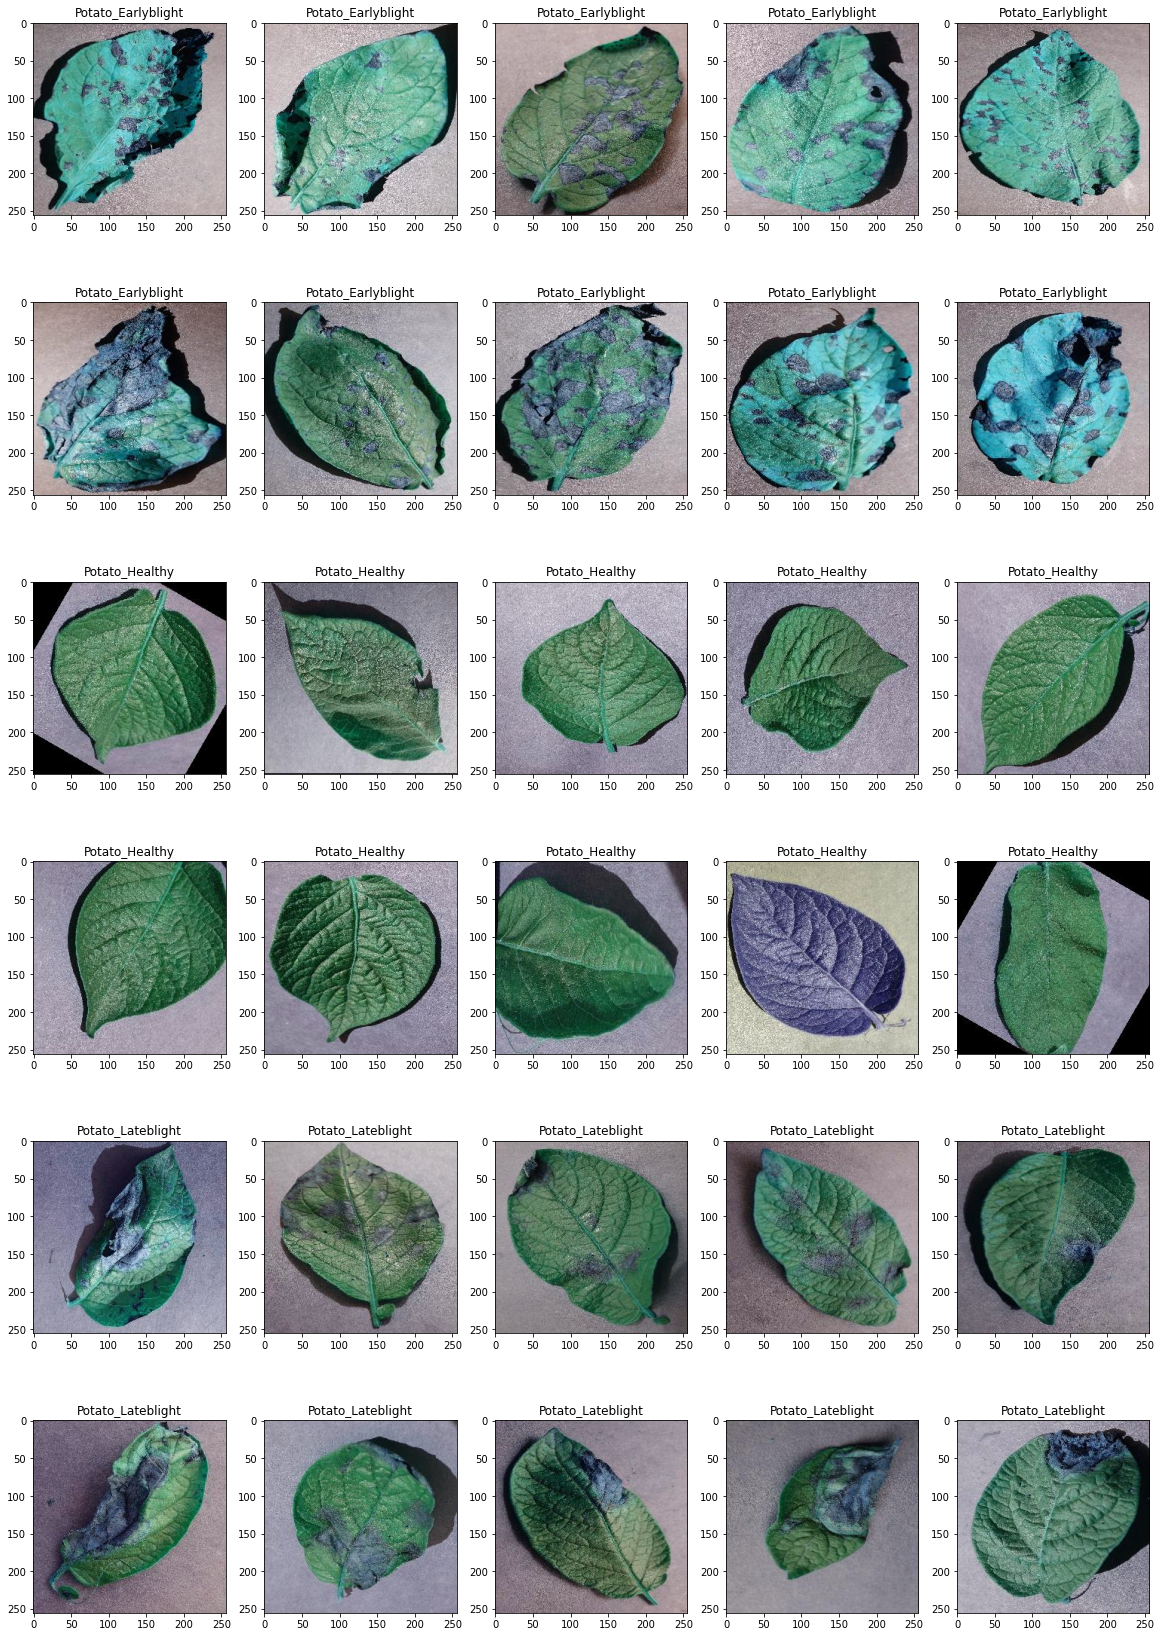

In [ ]:
#VISUALISASI DATA
fig, axs = plt.subplots(6, 5, figsize = (20, 30))
cnt = 0
row = 0
col = 0
for i in im_arr:
  for key, value in i.items():
    if(cnt == 5):
      row = row + 1
      col = 0
      cnt = 0
    axs[row, col].imshow(value)
    axs[row, col].set_title(key)
    cnt = cnt + 1
    col = col + 1

plt.show()

In [ ]:
# PREPROCESSING
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

In [ ]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

6147
6147
3028
3028


In [ ]:
# ARSITEKTURE
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
n_classes = 3

model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3))) #layer convolutional 2d
model.add(MaxPooling2D(pool_size = (2,2))) # max pooling with stride (2,2)
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2))) # max pooling with stride (2,2)
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2))) # max pooling with stride (2,2)
model.add(Dropout(0.25)) #delete neuron randomly while training and remain 75%
model.add(Flatten()) # make layer flatten
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5)) #delete neuron randomly while training and remain 50%
model.add(Dense(n_classes, activation = 'softmax')) 

In [ ]:
# COMPILE
from tensorflow.keras.optimizers import SGD
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr = lrate, momentum = 0.9, decay = decay, nesterov = False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 32)       0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
#TRAINING
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=32)
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/25
193/193 [==============================] - 474s 2s/step - loss: 0.9012 - accuracy: 0.5601 - val_loss: 0.6169 - val_accuracy: 0.7873
Epoch 2/25
193/193 [==============================] - 470s 2s/step - loss: 0.6968 - accuracy: 0.7101 - val_loss: 0.4519 - val_accuracy: 0.8213
Epoch 3/25
193/193 [==============================] - 472s 2s/step - loss: 0.5068 - accuracy: 0.8064 - val_loss: 0.6536 - val_accuracy: 0.6919
Epoch 4/25
193/193 [==============================] - 469s 2s/step - loss: 0.5919 - accuracy: 0.7661 - val_loss: 0.3359 - val_accuracy: 0.8801
Epoch 5/25
193/193 [==============================] - 469s 2s/step - loss: 0.5173 - accuracy: 0.8132 - val_loss: 0.3176 - val_accuracy: 0.8894
Epoch 6/25
193/193 [==============================] - 476s 2s/step - loss: 0.4402 - accuracy: 0.8443 - val_loss: 0.3274 - val_accuracy: 0.8887
Epoch 7/25
193/193 [==============================] - 473s 2s/step - loss: 0.3849 - accuracy: 0.8617 - val_loss: 0.4240 - val_accuracy: 0.8623

In [ ]:
#PREDIKSI
y_pred = model.predict(x_test)

In [ ]:
# ITERASI X_TEST
y_prediction_n = []
y_test_n = []
for i in range(0, len(y_pred)):
    max_n = max(y_pred[i])
    max_m = max(y_test[i])
    index_n = [index_n for index_n, j in enumerate(y_pred[i]) if j == max_n]
    index_m = [index_m for index_m, j in enumerate(y_test[i]) if j == max_m]
    y_prediction_n.append(index_n)
    y_test_n.append(index_m)

In [ ]:
# CLASSIFICATION REPORT
from sklearn.metrics import classification_report
print(classification_report(y_test_n, y_prediction_n, target_names=["Early Blight","NORMAL", "Late Blight"]))

              precision    recall  f1-score   support

Early Blight       0.94      0.97      0.96      1156
      NORMAL       0.98      0.99      0.98       750
 Late Blight       0.97      0.93      0.95      1122

    accuracy                           0.96      3028
   macro avg       0.96      0.96      0.96      3028
weighted avg       0.96      0.96      0.96      3028



In [ ]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 2, 0, ..., 0, 2, 2])

In [ ]:
y_test_class = np.argmax(y_test, axis=1)
y_test_class

array([0, 2, 0, ..., 0, 2, 1])

In [ ]:
# visualisasi confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sn
print(accuracy_score(y_test_class, y_pred))
confusion_matrix(y_test_class, y_pred)

0.9607001321003963


array([[1127,    5,   24],
       [   1,  743,    6],
       [  69,   14, 1039]])

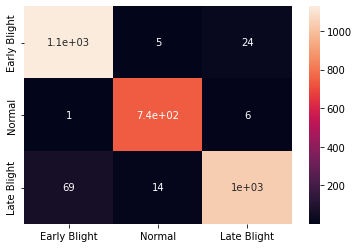

In [ ]:
cm = confusion_matrix(y_test_class, y_pred)
sn.heatmap(cm, annot=True, xticklabels=["Early Blight","Normal", "Late Blight"], yticklabels=["Early Blight","Normal", "Late Blight"])